# LEVEL 2

IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


READ IN THE CLEANED DATASET

In [3]:
df=pd.read_csv('cleaned_data.csv')
display(df)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# TASK 1: RESTAURANT RATINGS 

QUESTIONS:
1. Analyze the distribution of aggregate ratings and determine the most common rating range.
2. Calculate the average number of votes received by restaurants.

1. DISTRIBUTION OF AGGREGATE RATINGS AND MOST COMMON RATING RANGE

In [4]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

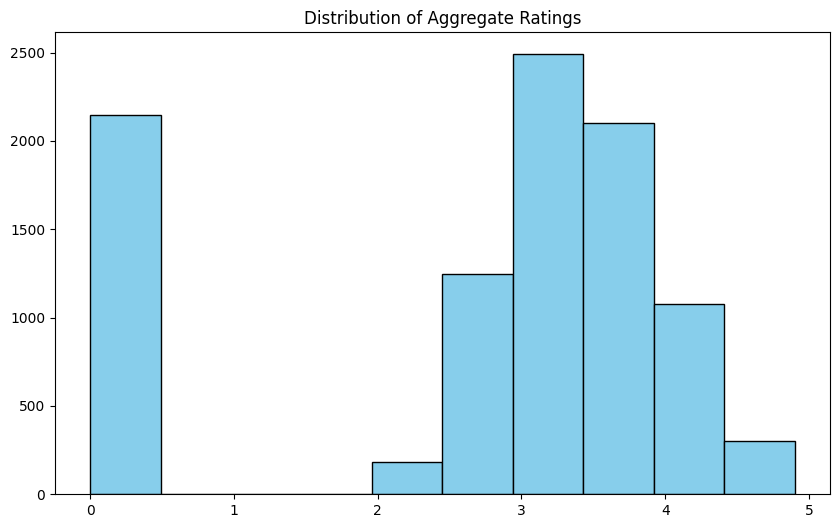

In [4]:
# visualize the distribution of Aggregate rating
plt.figure (figsize= (10, 6))
plt.hist(df['Aggregate rating'], bins=10, color= 'skyblue', edgecolor= 'black')
plt.title ("Distribution of Aggregate Ratings")
plt.xlabel= ("Aggregate rating")
plt.ylabel= ("Frequeny")
plt.show()

# Define rating ranges
bins = [0, 1, 2, 3, 4, 5]  

# Labels for ranges
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)


MOST COMMON RATING RANGE

In [5]:
# Determine the most common rating range
rating_distribution = df['Aggregate rating'].value_counts()
most_common_range = rating_distribution.idxmax()
print(f"The most common rating range is: {most_common_range}")

The most common rating range is: 0.0


2. AVERAGE NUMBER OF VOTES RECIEVED BY RESTAURANTS

In [6]:
average_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is {average_votes:.2f}")

The average number of votes received by restaurants is 156.91


# TASK 2 : CUISINE COMBINATION

QUESTIONS:
1. Identify the most common combinations of cuisines in the dataset.
2. Determine if certain cuisine combinations tend to have higher ratings.

1. THE MOST COMMON CUISINE COMBINATION

In [4]:
# Ensure cuisines are treated as list
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',') if isinstance(x,str) else [])

# Filter the restaurant that serve more than 1 cuisine
df_multiple_cuisine = df[df['Cuisines'].apply(len) > 1]


In [5]:

# Count occurrences of each unique cuisine combination
combination_counts = df_multiple_cuisine['Cuisines'].apply(lambda x: ', '.join(sorted(x))).value_counts()

# Get the most common cuisine combinations
print(combination_counts.head(10))

Cuisines
Chinese, North Indian              511
Mughlai, North Indian              334
Chinese,  Mughlai, North Indian    267
Desserts, Bakery                   170
Fast Food, Pizza                   131
Fast Food, Chinese                 118
Street Food, Mithai                116
Fast Food, Bakery                  108
North Indian, Chinese              105
Desserts, Ice Cream                 83
Name: count, dtype: int64


2. CUISINE COMBINATION THAT HAVE HIGHER RATING 

In [ ]:
df_multiple_cuisine = df[df['Cuisines'] .apply(len) > 1]
display(df_multiple_cuisine)

In [ ]:
avg_rating_multi = df_multiple_cuisine.groupby(df_multiple_cuisine)['Aggregate rating'].mean()

print(f"Average Rating (Multi Cuisine): {avg_rating_multi:.2f}")

In [31]:
print(df_multiple_cuisine[['Cuisines', 'Aggregate rating']].head(10))

                                   Cuisines  Aggregate rating
0            [French,  Japanese,  Desserts]               4.8
2     [Seafood,  Asian,  Filipino,  Indian]               4.4
3                        [Japanese,  Sushi]               4.9
4                       [Japanese,  Korean]               4.8
6                        [Asian,  European]               4.0
7   [Seafood,  Filipino,  Asian,  European]               4.2
8               [European,  Asian,  Indian]               4.9
10                     [Filipino,  Mexican]               4.9
11        [American,  Ice Cream,  Desserts]               4.2
12                     [Filipino,  Mexican]               4.8


In [33]:
avg_rating_multi = df_multiple_cuisine[ 'Aggregate rating']. mean()
print(avg_rating_multi)

2.905139882888744


# TASK 3 : GEOGRAPHIC ANALYSIS

QUESTIONS:
1. Plot the locations of restaurants on a map using longitude and latitude coordinates.
2. Identify any patterns or clusters of restaurants in specific areas.

1. MAP DISPLAYING THE LOCATIONS OF RESTAURANTS

In [9]:
coords = df[['Latitude', 'Longitude']]
print(coords)

       Latitude   Longitude
0     14.565443  121.027535
1     14.553708  121.014101
2     14.581404  121.056831
3     14.585318  121.056475
4     14.584450  121.057508
...         ...         ...
9546  41.022793   28.977392
9547  41.009847   29.041297
9548  41.055817   29.034640
9549  41.057979   29.036019
9550  40.984776   29.026016

[9551 rows x 2 columns]


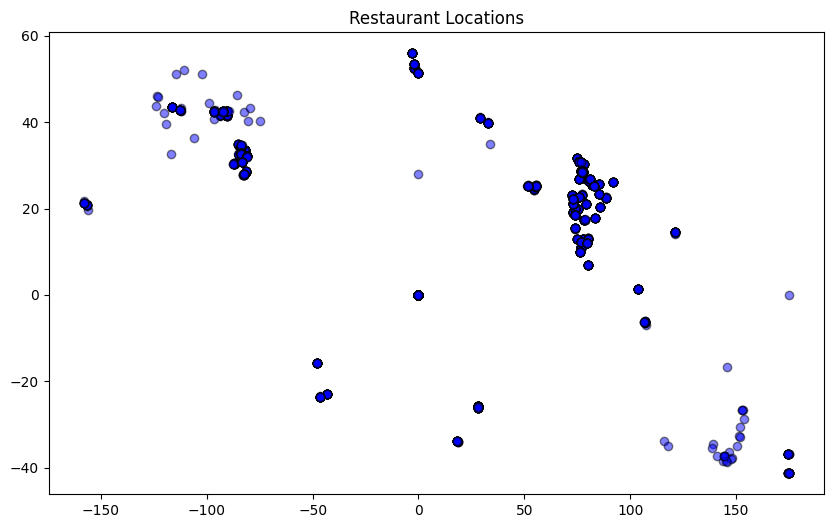

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue', edgecolors='black')
plt.title('Restaurant Locations')

plt.show()

2. PATTERNS AND CLUSTERS OF RESTAURANTS IN SPECIFIC AREAS

In [ ]:
# Extract coordinates
coords = df[['Latitude', 'Longitude']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=5, metric='haversine').fit(np.radians(coords))

# Add cluster labels to the DataFrame
df['Cluster'] = dbscan.labels_

# Count the number of restaurants in each cluster
cluster_counts = df['Cluster'].value_counts()

print(cluster_counts)

Cluster
 41    7549
 29     497
-1       47
 74      40
 27      40
 5       40
 0       22
 30      21
 6       20
 8       20
 7       20
 2       20
 1       20
 4       20
 3       20
 13      20
 12      20
 11      20
 10      20
 9       20
 21      20
 14      20
 20      20
 25      20
 24      20
 22      20
 23      20
 26      20
 37      20
 16      20
 15      20
 45      20
 39      20
 38      20
 34      20
 44      20
 72      20
 70      20
 73      20
 53      20
 59      20
 58      20
 61      20
 48      20
 49      20
 46      20
 17      20
 69      20
 67      20
 68      20
 71      20
 76      20
 54      19
 75      19
 65      19
 55      19
 66      19
 51      18
 47      18
 42      17
 36      17
 32      17
 50      17
 57      17
 60      16
 33      16
 64      15
 43      15
 31      15
 28      14
 35      14
 77      14
 56      14
 40      13
 63      13
 52      11
 19      10
 62      10
 18       9
Name: count, dtype: int64


The clustering analysis using DBSCAN identified multiple clusters of restaurants, with the majority concentrated in Cluster 41 (7,549 restaurants), indicating a high-density area. A smaller but significant cluster (Cluster 29) contains 497 restaurants. Several other clusters contain fewer restaurants, while 47 restaurants were classified as noise, suggesting they are isolated or do not belong to a major grouping. These results suggest that restaurants are highly concentrated in a few areas, with some scattered locations outside major clusters.

# TASK 4 : RESTAURANT CHAINS

QUESTIONS:
1. Identify if there are any restaurant chains present in the dataset.
2. Analyze the ratings and popularity of different restaurant chains.

1. RESTAURANT CHAINS PRESENT IN THE DATASET

In [9]:
# Restaurant chains are restaurant with the same name but in different locations

# Count how many times each restaurant name appears
restaurant_counts = df.groupby('Restaurant Name')['Restaurant ID'].nunique().reset_index()

# Filter restaurants that appear in multiple locations (chains)
restaurant_chains = restaurant_counts[restaurant_counts['Restaurant ID'] > 1]

# Display the restaurant chains
print(restaurant_chains)

           Restaurant Name  Restaurant ID
7        10 Downing Street              2
27      221 B Baker Street              3
44      34 Parkstreet Lane              2
45    34, Chowringhee Lane             12
59          4700BC Popcorn              2
...                    ...            ...
7382                 Zaika              4
7388     Zaika Kathi Rolls              2
7416                  Zizo              3
7423       Zooby's Kitchen              2
7431                  buno              2

[733 rows x 2 columns]


2. RATING AND POPULARITY OF DIFFERENT RESTAURANT CHAINS

In [19]:
# Group by restaurant chain and calculate average rating and total votes
chain_analysis = df.groupby('Restaurant Name').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum')
).reset_index()

print(chain_analysis)

           Restaurant Name  Avg_Rating  Total_Votes
0                      #45         3.6          209
1             #Dilliwaala6         3.7          124
2             #InstaFreeze         0.0            2
3              #OFF Campus         3.7          216
4               #Urban Caf         3.3           49
...                    ...         ...          ...
7440    t Lounge by Dilmah         3.6           34
7441                tashas         4.1          374
7442         ukuraa Sofras         4.4          296
7443              wagamama         3.7          131
7444  {Niche} - Cafe & Bar         4.1          492

[7445 rows x 3 columns]
